# Unit 6: Assignment - What's the Weather Like?

## Summary
* Latitude and temperature are strong relatively correlation. It shows an arch-sharped and right-skewed curve. The relationship between temperature and latitude is consistent with the current season, which demonstrates a peak at 20-degrees northern latitude.
* Latitude and humidity are the low correlation.
* Latitude and cloudiness are zero correlation. So are latitude and wind-speed.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint 

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the cile y count to confirm sufficient count
len(cities)

630

## Perform API Calls

In [3]:
# OpenWeatherMap API Key


# Starting URL for Weather Map API Call


url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
api_key = api_keys.api_key
query_url = f"{url}appid={api_key}&units={units}&q="




In [4]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
test_cities = cities[0]
print(query_url + test_cities)
response = requests.get(query_url + test_cities).json()
pprint.pprint(response)


http://api.openweathermap.org/data/2.5/weather?appid=8da4a5c7f8bbdab9b89c7b6e9cffc479&units=imperial&q=ushuaia
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -54.81, 'lon': -68.31},
 'dt': 1533618000,
 'id': 3833367,
 'main': {'humidity': 80,
          'pressure': 1009,
          'temp': 33.8,
          'temp_max': 33.8,
          'temp_min': 33.8},
 'name': 'Ushuaia',
 'sys': {'country': 'AR',
         'id': 4754,
         'message': 0.0107,
         'sunrise': 1533643814,
         'sunset': 1533676104,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'shower rain',
              'icon': '09n',
              'id': 521,
              'main': 'Rain'}],
 'wind': {'deg': 200, 'speed': 5.82}}


In [5]:
lat = []
temp = []
wind = []
humidity = []
cloud = []

for city in cities:
    response = requests.get(query_url + city).json() 
    
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])

    
    except:
        lat.append(np.nan)
        temp.append(np.nan)
        humidity.append(np.nan)
        cloud.append(np.nan)
        wind.append(np.nan)
    

data = pd.DataFrame({"City": cities,
                    "Latitude": lat,
                    "Tempature": temp,
                    "Humidity": humidity,
                    "Wind Speed": wind,
                    "Cloudness": cloud})
data = data.dropna()
data = data.reset_index(drop = True)


In [6]:
data

,City,Cloudness,Humidity,Latitude,Tempature,Wind Speed
0,ushuaia,90.0,80.0,-54.81,33.80,5.82
1,kovdor,44.0,68.0,67.56,50.97,6.58
2,itarema,24.0,88.0,-2.92,75.72,12.28
3,dingle,92.0,100.0,11.00,75.27,10.38
4,seoul,40.0,67.0,37.57,93.27,4.70
5,clifton,0.0,20.0,-27.93,64.40,17.22
6,jamestown,88.0,94.0,-33.21,50.34,14.74
7,victoria,75.0,74.0,5.28,87.84,4.70
8,mondragone,0.0,88.0,41.11,76.03,4.70
9,carnarvon,80.0,94.0,-30.97,34.32,12.62


In [8]:
outpath = "output/cities_weather_data.csv"
data.to_csv(outpath, index_label = None)

In [9]:
import datetime
now = datetime.datetime.now()
datatime = now.strftime("%m/%d/%y")
print(datatime)

08/07/18


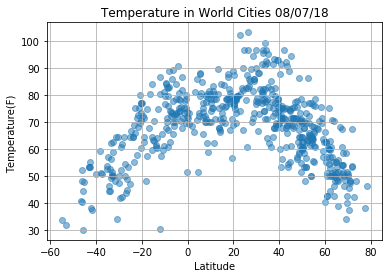

In [10]:
# Build a scatter plot 
plt.scatter(data["Latitude"], data["Tempature"], marker="o", alpha = 0.5)

# Incorporate the other graph properties
plt.title("Temperature in World Cities " + datatime)
plt.ylabel("Temperature(F) ")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Temperature In World Cities.png")
plt.show()

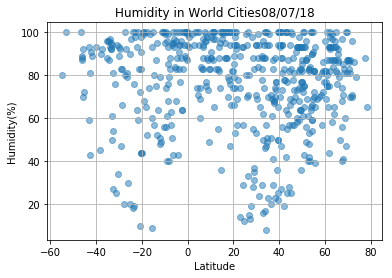

In [11]:
plt.scatter(data["Latitude"], data["Humidity"], marker="o", alpha = 0.5)

# Incorporate the other graph properties
plt.title("Humidity in World Cities"+ datatime)
plt.ylabel("Humidity(%)" )
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity in World Cities.png")
plt.show()

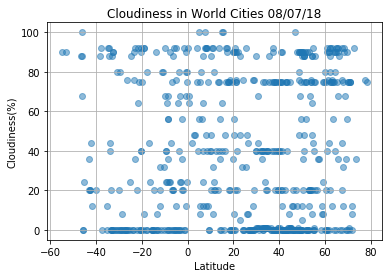

In [12]:
plt.scatter(data["Latitude"], data["Cloudness"], marker="o", alpha = 0.5)

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities "+ datatime)
plt.ylabel("Cloudiness(%)" )
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness in World Cities.png")
plt.show()

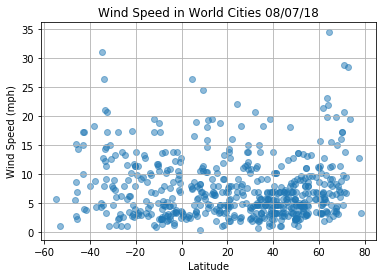

In [13]:
plt.scatter(data["Latitude"], data["Wind Speed"], marker="o", alpha = 0.5)

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities "+ datatime)
plt.ylabel('Wind Speed (mph)' )
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Wind Speed in World Cities.png")
plt.show()